# Fetch Data

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
import pandas as pd
train = pd.read_csv("/users/bajajvbh/Desktop/Projects/Project_housing/training_set.csv")

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Drop Unnecessary

In [14]:
for i in train.columns:
    print(i,len(train[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

In [17]:
train = train.drop("Id",axis=1)

# Find and replace Missing Data

In [19]:
from miss import replacer
replacer(train)

In [21]:
#train.isna().sum()

# Define X and Y

In [99]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [159]:
Y = train[["SalePrice"]]
X = train.drop("SalePrice",axis=1)

# Seperate cat and con

In [160]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

# Univariate

In [161]:
import numpy as np

In [162]:
X.skew().sort_values() > 0.7

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [163]:
cols_with_skew = ["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage","MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [164]:
cols_with_skew

['2ndFlrSF',
 'BsmtUnfSF',
 'GrLivArea',
 '1stFlrSF',
 'MSSubClass',
 'TotalBsmtSF',
 'WoodDeckSF',
 'BsmtFinSF1',
 'OpenPorchSF',
 'LotFrontage',
 'MasVnrArea',
 'EnclosedPorch',
 'BsmtHalfBath',
 'ScreenPorch',
 'BsmtFinSF2',
 'KitchenAbvGr',
 'LowQualFinSF',
 '3SsnPorch',
 'LotArea',
 'PoolArea',
 'MiscVal']

# Bivariate

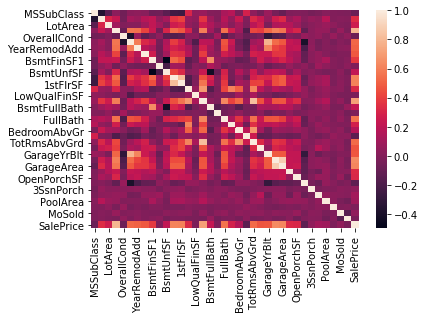

In [165]:
import seaborn as sb
sb.heatmap(train.corr())

In [166]:
imp_cols = list(train.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

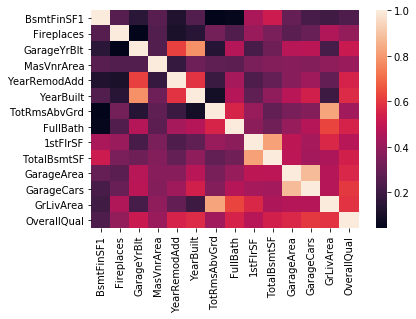

In [167]:
sb.heatmap(X[imp_cols].corr())

# Data Preparation

In [168]:
X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X[imp_cols]),columns=imp_cols)
X = X2.join(X1)

# OLS model

In [169]:
X = X.drop(['GrLivArea', 'BsmtFinSF1', 'OverallQual', 'YearRemodAdd', 'MasVnrArea'],axis=1)

In [170]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     55.84
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:29:27   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.406e+04
Df Residuals:                    1242   BIC:                         3.521e+04
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.383e+04   2825.175      4.895      0.000    8287.814    1.94e+04
Fireplaces             4555.9183   1103.879      4.127      0.000    2390.246    6721.591
GarageYrBlt           -1429.2370   1518.288     -0.941      0.347   -4407.930    1549.456
YearBuilt              5324.4213   2457.112      2.167      0.030     503.872    1.01e+04
TotRmsAbvGrd           6405.1106   1480.792      4.325      0.000    3499.981    9310.241
FullBath               4095.1837   1209.863      3.385      0.001    1721.582    6468.785
1stFlrSF               1.735e+04   2234.870      7.761      0.000     1.3e+04    2.17e+04
TotalBsmtSF            7591.7036   1940.746      3.912      0.000    3784.200    1.14e+04
GarageArea             6393.1584   1883.702      3.394      0.001    2697.569    1.01e+04
GarageCars             2128.4704   1877.216      1.134      0.257   -1554.394    5811.335
MSZoning_C (all)      -3.578e+04   9176.635     -3.900      0.000   -5.38e+04   -1.78e+04
MSZoning_FV            1.848e+04   6812.143      2.713      0.007    5118.571    3.18e+04
MSZoning_RH            1.372e+04   6764.467      2.029      0.043     452.312     2.7e+04
MSZoning_RL            1.035e+04   3598.940      2.875      0.004    3285.529    1.74e+04
MSZoning_RM            7062.5153   4074.792      1.733      0.083    -931.720    1.51e+04
Street_Grvl            1223.6881   7127.779      0.172      0.864   -1.28e+04    1.52e+04
Street_Pave            1.261e+04   6557.310      1.923      0.055    -257.861    2.55e+04
Alley_Grvl             2865.8278   2962.447      0.967      0.334   -2946.124    8677.780
Alley_Pave             1.096e+04   3124.767      3.509      0.000    4834.223    1.71e+04
LotShape_IR1          -2895.7988   2957.102     -0.979      0.328   -8697.265    2905.667
LotShape_IR2           4014.3422   4263.580      0.942      0.347   -4350.273    1.24e+04
LotShape_IR3           1.451e+04   7419.914      1.956      0.051     -42.224    2.91e+04
LotShape_Reg          -1802.8136   3058.079     -0.590      0.556   -7802.384    4196.757
LandContour_Bnk         530.4462   3570.316      0.149      0.882   -6474.071    7534.964
LandContour_HLS        8583.5121   3675.164      2.336      0.020    1373.297    1.58e+04
LandContour_Low       -1737.1213   4690.639     -0.370      0.711   -1.09e+04    7465.330
LandContour_Lvl        6453.6188   2663.651      2.423      0.016    1227.867    1.17e+04
Utilities_AllPub       2.171e+04   1.39e+04      1.557      0.120   -5651.645    4.91e+04
Utilities_NoSeWa      -7881.6750   1.53e+04     -0.516      0.606   -3.79e+04    2.21e+04
LotConfig_Corner       7380.5139   3401.033      2.170      0.030     708.109    1.41e+04
LotConfig_CulDSac      1.584e+04   4003.509      3.957      0.000    7988.885    2.37e+04
LotConfig_FR2         -

In [171]:
model.pvalues.sort_values().index

Index(['RoofMatl_ClyTile', 'Neighborhood_NoRidge', 'BsmtExposure_Gd',
       'RoofMatl_WdShngl', 'BldgType_1Fam', 'KitchenQual_Ex', '1stFlrSF',
       'Neighborhood_StoneBr', 'BsmtQual_Ex', 'Condition2_PosN',
       ...
       'Functional_Maj1', 'Exterior2nd_Other', 'Heating_Floor',
       'RoofStyle_Mansard', 'Condition2_Artery', 'BldgType_TwnhsE',
       'PavedDrive_P', 'Condition1_RRNe', 'HouseStyle_1.5Unf',
       'Exterior1st_AsphShn'],
      dtype='object', length=262)

In [172]:
#Q.sort_values(by="Pval")

In [173]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn',
       'Exterior2nd_Other', 'Heating_Floor', 'PavedDrive_P'],
      dtype='object')

In [174]:
X = X.drop(['Condition1_RRNe', 'Condition2_Artery', 'BldgType_TwnhsE','HouseStyle_1.5Unf', 'RoofStyle_Mansard', 'Exterior1st_AsphShn','Exterior2nd_AsbShng', 'Exterior2nd_Other', 'BsmtCond_Fa','Heating_Floor', 'Heating_OthW', 'Functional_Maj1', 'PavedDrive_P'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     56.45
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:29:28   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.405e+04
Df Residuals:                    1244   BIC:                         3.519e+04
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.353e+04   6998.528      1.933      0.053    -203.871    2.73e+04
Fireplaces             4556.9469   1102.947      4.132      0.000    2393.104    6720.789
GarageYrBlt           -1406.9361   1507.760     -0.933      0.351   -4364.970    1551.098
YearBuilt              5289.0973   2442.145      2.166      0.031     497.920    1.01e+04
TotRmsAbvGrd           6408.9281   1479.352      4.332      0.000    3506.627    9311.229
FullBath               4091.4419   1208.462      3.386      0.001    1720.594    6462.290
1stFlrSF               1.734e+04   2232.426      7.768      0.000     1.3e+04    2.17e+04
TotalBsmtSF            7606.0786   1935.669      3.929      0.000    3808.543    1.14e+04
GarageArea             6392.1942   1881.934      3.397      0.001    2700.080    1.01e+04
GarageCars             2128.2579   1875.042      1.135      0.257   -1550.337    5806.852
MSZoning_C (all)      -3.583e+04   9258.055     -3.871      0.000    -5.4e+04   -1.77e+04
MSZoning_FV            1.839e+04   6930.771      2.653      0.008    4789.797     3.2e+04
MSZoning_RH            1.366e+04   6877.100      1.986      0.047     163.033    2.71e+04
MSZoning_RL            1.028e+04   3819.682      2.691      0.007    2784.667    1.78e+04
MSZoning_RM            7039.4960   4232.377      1.663      0.097   -1263.889    1.53e+04
Street_Grvl            1091.9697   7824.531      0.140      0.889   -1.43e+04    1.64e+04
Street_Pave            1.243e+04   7272.521      1.710      0.088   -1833.379    2.67e+04
Alley_Grvl             2670.7976   4404.487      0.606      0.544   -5970.245    1.13e+04
Alley_Pave             1.086e+04   4406.654      2.463      0.014    2210.260    1.95e+04
LotShape_IR1          -2977.7613   3364.686     -0.885      0.376   -9578.848    3623.325
LotShape_IR2           3935.6836   4574.016      0.860      0.390   -5037.954    1.29e+04
LotShape_IR3           1.444e+04   7559.118      1.910      0.056    -392.839    2.93e+04
LotShape_Reg          -1868.7612   3469.552     -0.539      0.590   -8675.580    4938.057
LandContour_Bnk         444.3548   3884.506      0.114      0.909   -7176.552    8065.261
LandContour_HLS        8518.1732   4014.233      2.122      0.034     642.759    1.64e+04
LandContour_Low       -1819.5656   4955.201     -0.367      0.714   -1.15e+04    7901.909
LandContour_Lvl        6383.3889   3117.180      2.048      0.041     267.879    1.25e+04
Utilities_AllPub       2.157e+04   1.42e+04      1.521      0.129   -6259.118    4.94e+04
Utilities_NoSeWa      -8041.0955   1.57e+04     -0.512      0.609   -3.89e+04    2.28e+04
LotConfig_Corner       7299.1835   3595.647      2.030      0.043     244.981    1.44e+04
LotConfig_CulDSac      1.578e+04   4149.501      3.803      0.000    7640.855    2.39e+04
LotConfig_FR2         -

In [175]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_MetalSd'],
      dtype='object')

In [176]:
X = X.drop(['LandContour_Bnk', 'RoofStyle_Flat', 'Exterior1st_AsbShng','Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior2nd_MetalSd','Heating_Grav'],axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     58.31
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:29:28   Log-Likelihood:                -16810.
No. Observations:                1460   AIC:                         3.404e+04
Df Residuals:                    1250   BIC:                         3.515e+04
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.377e+04   5102.064      2.699      0.007    3759.975    2.38e+04
Fireplaces             4548.0633   1100.070      4.134      0.000    2389.875    6706.251
GarageYrBlt           -1312.8264   1497.109     -0.877      0.381   -4249.950    1624.297
YearBuilt              5183.5013   2418.878      2.143      0.032     437.992    9929.010
TotRmsAbvGrd           6347.9664   1472.171      4.312      0.000    3459.769    9236.164
FullBath               4070.6388   1202.748      3.384      0.001    1711.011    6430.267
1stFlrSF               1.744e+04   2177.422      8.008      0.000    1.32e+04    2.17e+04
TotalBsmtSF            7483.9836   1884.304      3.972      0.000    3787.236    1.12e+04
GarageArea             6364.7045   1875.369      3.394      0.001    2685.487       1e+04
GarageCars             2153.7162   1869.669      1.152      0.250   -1514.319    5821.751
MSZoning_C (all)      -3.594e+04   9181.019     -3.914      0.000    -5.4e+04   -1.79e+04
MSZoning_FV            1.854e+04   6830.684      2.715      0.007    5142.122    3.19e+04
MSZoning_RH            1.347e+04   6788.365      1.984      0.047     149.423    2.68e+04
MSZoning_RL            1.044e+04   3680.881      2.837      0.005    3219.569    1.77e+04
MSZoning_RM            7256.7931   4120.379      1.761      0.078    -826.829    1.53e+04
Street_Grvl            1175.8291   7439.171      0.158      0.874   -1.34e+04    1.58e+04
Street_Pave            1.259e+04   6837.786      1.842      0.066    -821.102     2.6e+04
Alley_Grvl             2801.4906   3568.154      0.785      0.433   -4198.740    9801.721
Alley_Pave             1.097e+04   3795.785      2.890      0.004    3521.226    1.84e+04
LotShape_IR1          -2744.3198   3132.567     -0.876      0.381   -8889.989    3401.350
LotShape_IR2           4124.8769   4378.133      0.942      0.346   -4464.423    1.27e+04
LotShape_IR3           1.401e+04   7432.853      1.884      0.060    -575.526    2.86e+04
LotShape_Reg          -1617.7450   3226.364     -0.501      0.616   -7947.431    4711.941
LandContour_HLS        8509.7033   5799.080      1.467      0.143   -2867.301    1.99e+04
LandContour_Low       -1777.1288   7049.817     -0.252      0.801   -1.56e+04    1.21e+04
LandContour_Lvl        6271.9452   4184.519      1.499      0.134   -1937.511    1.45e+04
Utilities_AllPub       2.199e+04   1.39e+04      1.585      0.113   -5236.132    4.92e+04
Utilities_NoSeWa      -8220.9735   1.55e+04     -0.530      0.596   -3.86e+04    2.22e+04
LotConfig_Corner       7377.8464   3457.909      2.134      0.033     593.900    1.42e+04
LotConfig_CulDSac      1.593e+04   4022.718      3.959      0.000    8032.990    2.38e+04
LotConfig_FR2         -4044.2921   4485.660     -0.902      0.367   -1.28e+04    4755.961
LotConfig_FR3         -

In [177]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
E = list(Q[Q.Pval > 0.4].index)

In [178]:
X = X.drop(E,axis=1)
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     82.08
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -16839.
No. Observations:                1460   AIC:                         3.398e+04
Df Residuals:                    1310   BIC:                         3.477e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9878.7442    1.5e+04      0.657      0.511   -1.96e+04    3.94e+04
Fireplaces             4493.6198   1064.668      4.221      0.000    2404.980    6582.260
GarageYrBlt           -1399.6704   1441.819     -0.971      0.332   -4228.198    1428.857
YearBuilt              5457.8570   2070.345      2.636      0.008    1396.303    9519.411
TotRmsAbvGrd           6197.7098   1393.766      4.447      0.000    3463.452    8931.967
FullBath               4311.5450   1158.393      3.722      0.000    2039.036    6584.054
1stFlrSF               1.776e+04   1996.408      8.894      0.000    1.38e+04    2.17e+04
TotalBsmtSF            6765.2448   1547.639      4.371      0.000    3729.124    9801.366
GarageArea             6744.3566   1809.673      3.727      0.000    3194.183    1.03e+04
GarageCars             2015.9561   1821.727      1.107      0.269   -1557.865    5589.777
MSZoning_C (all)      -3.475e+04   8994.758     -3.863      0.000   -5.24e+04   -1.71e+04
MSZoning_FV            2.057e+04   5351.570      3.844      0.000    1.01e+04    3.11e+04
MSZoning_RH             1.08e+04   7018.105      1.539      0.124   -2967.279    2.46e+04
MSZoning_RL            8868.1668   4439.165      1.998      0.046     159.516    1.76e+04
MSZoning_RM            4388.6872   4522.343      0.970      0.332   -4483.138    1.33e+04
Street_Pave            7593.1220   1.25e+04      0.609      0.543   -1.69e+04    3.21e+04
Alley_Pave             9544.5402   5090.524      1.875      0.061    -441.930    1.95e+04
LotShape_IR1           -752.0350   1780.379     -0.422      0.673   -4244.742    2740.672
LotShape_IR2           5455.2359   4751.438      1.148      0.251   -3866.024    1.48e+04
LotShape_IR3           1.415e+04   9276.957      1.525      0.127   -4048.858    3.23e+04
LandContour_HLS        8317.7840   5097.325      1.632      0.103   -1682.029    1.83e+04
LandContour_Lvl        5537.1293   3541.444      1.564      0.118   -1410.393    1.25e+04
Utilities_AllPub       2.905e+04   2.83e+04      1.026      0.305   -2.65e+04    8.46e+04
LotConfig_Corner       1.595e+04    1.4e+04      1.143      0.253   -1.14e+04    4.33e+04
LotConfig_CulDSac      2.464e+04   1.43e+04      1.728      0.084   -3340.916    5.26e+04
LotConfig_FR2          3782.3077   1.44e+04      0.263      0.792   -2.44e+04     3.2e+04
LotConfig_Inside       1.312e+04   1.38e+04      0.948      0.343    -1.4e+04    4.03e+04
LandSlope_Mod          6813.8712   4195.954      1.624      0.105   -1417.653     1.5e+04
Neighborhood_Blmngtn  -6445.0053   7887.485     -0.817      0.414   -2.19e+04    9028.477
Neighborhood_ClearCr  -4418.8624   6395.972     -0.691      0.490    -1.7e+04    8128.605
Neighborhood_CollgCr  -3256.6667   3614.889     -0.901      0.368   -1.03e+04    3834.938
Neighborhood_Crawfor   

In [179]:
E

['Street_Grvl',
 'Alley_Grvl',
 'LotShape_Reg',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_RRAn',
 'BldgType_2fmCon',
 'BldgType_Twnhs',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'ExterQual_Fa',
 'ExterCond_Fa',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_BrkTil',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQu

In [180]:
X.columns

Index(['Fireplaces', 'GarageYrBlt', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath',
       '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'MSZoning_C (all)',
       ...
       'Fence_MnWw', 'MiscFeature_Gar2', 'SaleType_COD', 'SaleType_New',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=156)

# Divide the data in training and testing set

In [182]:
from sklearn.model_selection import train_test_split,GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [191]:
x = 0
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0 =============
Training Error:  16064.32
Testing Error:  21446.15
Overfitting
=============== 5e-05 =============
Training Error:  15956.86
Testing Error:  21275.65
Overfitting
=============== 0.0001 =============
Training Error:  15956.91
Testing Error:  21275.64
Overfitting
=============== 0.00015000000000000001 =============
Training Error:  15956.96
Testing Error:  21275.62
Overfitting
=============== 0.0002 =============
Training Error:  15957.01
Testing Error:  21275.6
Overfitting
=============== 0.00025 =============
Training Error:  15957.06
Testing Error:  21275.58
Overfitting
=============== 0.00030000000000000003 =============
Training Error:  15957.11
Testing Error:  21275.57
Overfitting
=============== 0.00035000000000000005 =============
Training Error:  15957.16
Testing Error:  21275.55
Overfitting
=============== 0.0004000000000000001 =============
Training Error:  15957.21
Testing Error:  21275.53
Overfitting
=============== 0.0004500000000000001 =====

In [195]:
x = 1
for i in range(0,30):
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.05

=============== 1 =============
Training Error:  15965.95
Testing Error:  21245.97
Overfitting
=============== 1.05 =============
Training Error:  15966.55
Testing Error:  21244.61
Overfitting
=============== 1.1 =============
Training Error:  15967.15
Testing Error:  21243.24
Overfitting
=============== 1.1500000000000001 =============
Training Error:  15967.74
Testing Error:  21241.87
Overfitting
=============== 1.2000000000000002 =============
Training Error:  15968.34
Testing Error:  21240.49
Overfitting
=============== 1.2500000000000002 =============
Training Error:  15968.94
Testing Error:  21239.11
Overfitting
=============== 1.3000000000000003 =============
Training Error:  15969.5
Testing Error:  21237.75
Overfitting
=============== 1.3500000000000003 =============
Training Error:  15970.07
Testing Error:  21236.45
Overfitting
=============== 1.4000000000000004 =============
Training Error:  15970.65
Testing Error:  21235.15
Overfitting
=============== 1.4500000000000004 ====

In [198]:
test = pd.read_csv("/users/bajajvbh/Desktop/Projects/Project_housing/testing_set.csv")

In [200]:
replacer(test)

In [204]:
cols_keep = list(xtrain.columns)

In [206]:
cat = []
con = []
for i in test.columns:
    if(test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [210]:
X1 = pd.DataFrame(ss.fit_transform(test[con]),columns=con)

In [212]:
X2 = pd.get_dummies(test[cat])

In [213]:
X = X1.join(X2)

In [218]:
X[cols_keep]

KeyError: "['HouseStyle_2.5Fin', 'RoofMatl_Membran', 'Condition2_RRAe', 'PoolQC_Fa', 'GarageQual_Ex', 'Condition2_RRNn', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'RoofMatl_Metal'] not in index"

In [219]:
cols_to_add = ['HouseStyle_2.5Fin', 'RoofMatl_Membran', 'Condition2_RRAe', 'PoolQC_Fa', 'GarageQual_Ex', 'Condition2_RRNn', 'RoofMatl_Roll', 'RoofMatl_ClyTile', 'RoofMatl_Metal']

In [220]:
cols_to_add

['HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'Condition2_RRAe',
 'PoolQC_Fa',
 'GarageQual_Ex',
 'Condition2_RRNn',
 'RoofMatl_Roll',
 'RoofMatl_ClyTile',
 'RoofMatl_Metal']

In [221]:
for i in cols_to_add:
    X[i]=0

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleCondition_Partial,HouseStyle_2.5Fin,RoofMatl_Membran,Condition2_RRAe,PoolQC_Fa,GarageQual_Ex,Condition2_RRNn,RoofMatl_Roll,RoofMatl_ClyTile,RoofMatl_Metal
0,-1.730864,-0.874711,0.555590,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,...,0,0,0,0,0,0,0,0,0,0
1,-1.728490,-0.874711,0.604242,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,...,0,0,0,0,0,0,0,0,0,0
2,-1.726115,0.061351,0.263679,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,...,0,0,0,0,0,0,0,0,0,0
3,-1.723741,0.061351,0.458286,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,...,0,0,0,0,0,0,0,0,0,0
4,-1.721367,1.465443,-1.244530,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,...,0,0,0,0,0,0,0,0,0,0
5,-1.718993,0.061351,0.312331,0.036505,-0.054877,-0.497418,0.712392,0.489377,-0.570108,-0.965376,...,0,0,0,0,0,0,0,0,0,0
6,-1.716618,-0.874711,-0.000015,-0.371261,-0.054877,1.298950,0.679475,1.104813,-0.570108,1.089768,...,0,0,0,0,0,0,0,0,0,0
7,-1.714244,0.061351,-0.271492,-0.286074,-0.054877,-0.497418,0.876976,0.678742,-0.570108,-0.965376,...,0,0,0,0,0,0,0,0,0,0
8,-1.711870,-0.874711,0.798850,0.072033,0.641347,-0.497418,0.613642,0.300012,-0.570108,0.434759,...,0,0,0,0,0,0,0,0,0,0
9,-1.709495,-0.874711,0.069071,-0.286478,-1.447325,-0.497418,-0.044694,-0.646813,-0.570108,0.801828,...,0,0,0,0,0,0,0,0,0,0


In [225]:
final_preds = model.predict(X[cols_keep])

In [227]:
test["Predicted_sale_Price"]=final_preds

In [230]:
test[["Id","Predicted_sale_Price"]].to_csv("Desktop/submission.csv")

In [235]:
pd.set_option("display.max_rows",5000)

In [236]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.00,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,267774.021557
1,1462,20,RL,81.00,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,311714.187937
2,1463,60,RL,74.00,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,336531.928959
3,1464,60,RL,78.00,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,347533.726295
4,1465,120,RL,43.00,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,344871.769285
5,1466,60,RL,75.00,10000,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,311141.268331
6,1467,20,RL,68.58,7980,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,GdPrv,Shed,500,3,2010,WD,Normal,305993.741287
7,1468,60,RL,63.00,8402,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal,316052.548206
8,1469,20,RL,85.00,10176,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2010,WD,Normal,346062.803479
9,1470,20,RL,70.00,8400,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,260852.354700
